In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('/content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered.zip')

68616192/68606236 [==============================] - 1s 0us/step


In [14]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs.zip')
New_PATH="/content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs"
!unzip $PATH -d $New_PATH

Archive:  /content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs.zip
   creating: /content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered/
  inflating: /content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered/vectorize.py  
   creating: /content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/
   creating: /content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered/train/
   creating: /content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/
  inflating: /content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: /content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating:

In [9]:
!ls /content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs_filtered

ls: cannot access '/content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs_filtered': No such file or directory


In [5]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [6]:
train_dir

'/content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs_filtered/train'

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
len(sample_training_images)

128

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

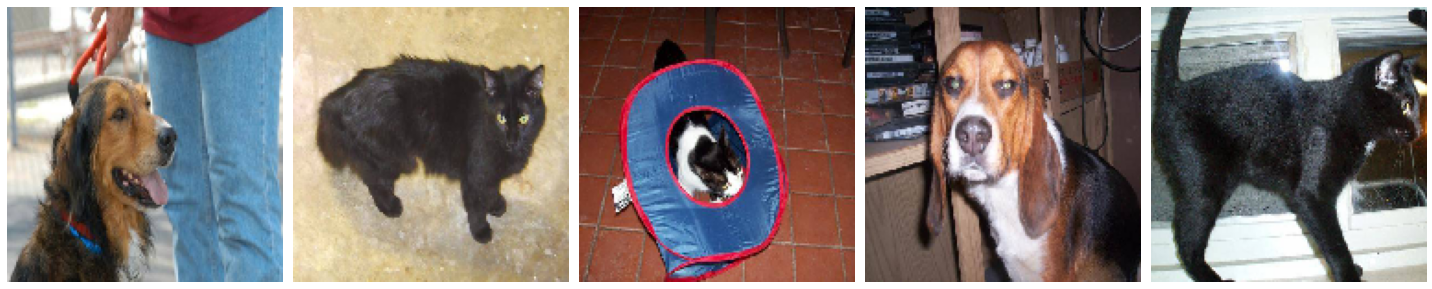

In [ ]:
plotImages(sample_training_images[6:11])

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
epochs = 30
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/30
15/15 [==============================] - 21s 551ms/step - loss: 1.0371 - accuracy: 0.5176 - val_loss: 0.6925 - val_accuracy: 0.4989
Epoch 2/30
15/15 [==============================] - 8s 530ms/step - loss: 0.6914 - accuracy: 0.5032 - val_loss: 0.6869 - val_accuracy: 0.4978
Epoch 3/30
15/15 [==============================] - 8s 528ms/step - loss: 0.6668 - accuracy: 0.5395 - val_loss: 0.6527 - val_accuracy: 0.5737
Epoch 4/30
15/15 [==============================] - 8s 524ms/step - loss: 0.6250 - accuracy: 0.6074 - val_loss: 0.6280 - val_accuracy: 0.6451
Epoch 5/30
15/15 [==============================] - 8s 524ms/step - loss: 0.5843 - accuracy: 0.6907 - val_loss: 0.6350 - val_accuracy: 0.6150
Epoch 6/30
15/15 [==============================] - 8s 526ms/step - loss: 0.5216 - accuracy: 0.7238 - val_loss: 0.5962 - val_accuracy: 0.6797
Epoch 7/30
15/15 [==============================] - 8s 523ms/step - loss: 0.4805 - accuracy: 0.7543 - val_loss: 0.5701 - val_accuracy: 0.6775
Epoch

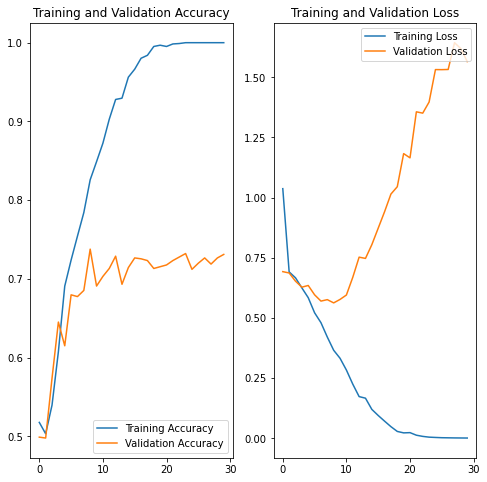

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Data Augmentation

Horizontal Flip

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

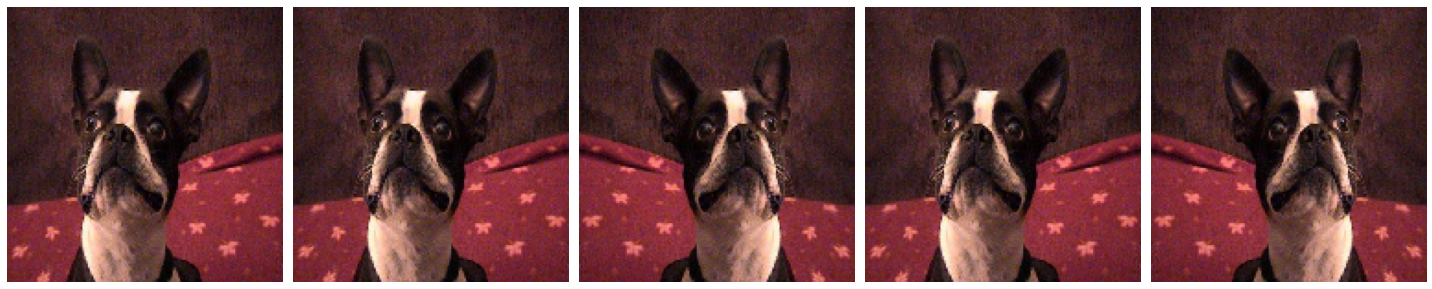

In [ ]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

Randomly rotate the image

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


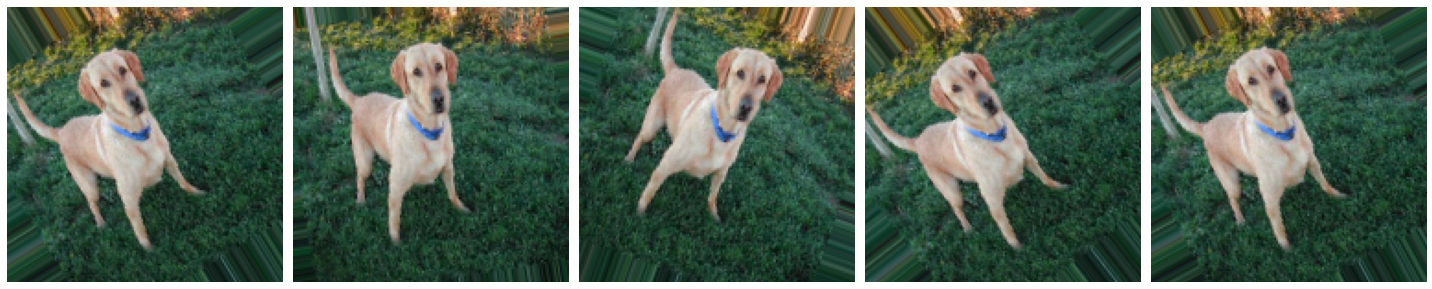

In [ ]:
plotImages(augmented_images)

Apply zoom augmentation

In [ ]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


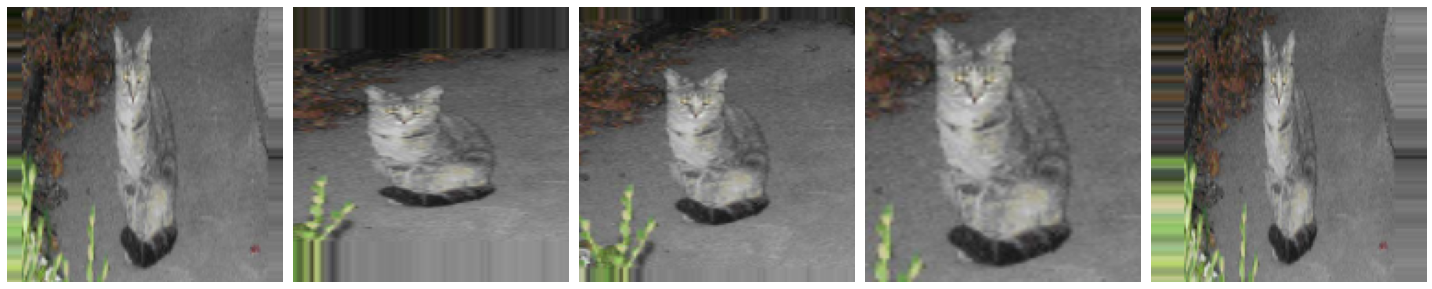

In [ ]:
plotImages(augmented_images)

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


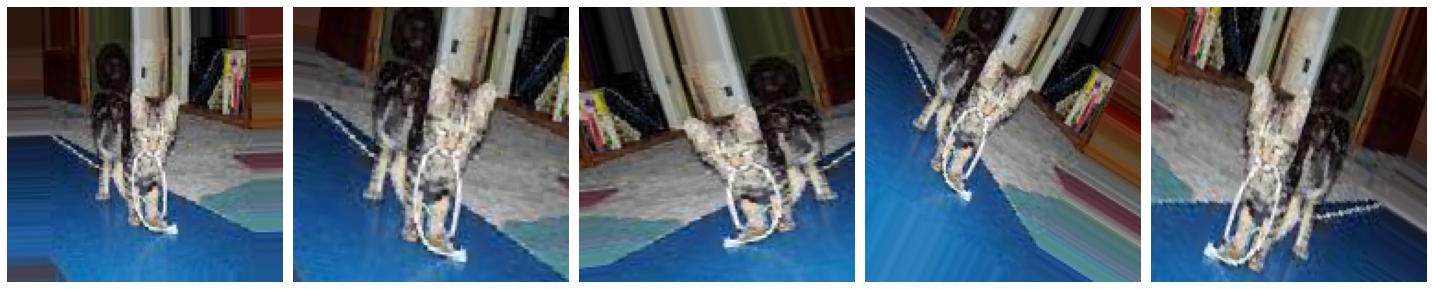

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


Dropout

In [ ]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)       

In [ ]:
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/30
15/15 [==============================] - 17s 1s/step - loss: 1.1402 - accuracy: 0.5075 - val_loss: 0.6931 - val_accuracy: 0.5022
Epoch 2/30
15/15 [==============================] - 16s 1s/step - loss: 0.6931 - accuracy: 0.4989 - val_loss: 0.6920 - val_accuracy: 0.4955
Epoch 3/30
15/15 [==============================] - 16s 1s/step - loss: 0.6916 - accuracy: 0.5027 - val_loss: 0.6895 - val_accuracy: 0.5045
Epoch 4/30
15/15 [==============================] - 16s 1s/step - loss: 0.6873 - accuracy: 0.5016 - val_loss: 0.6842 - val_accuracy: 0.4944
Epoch 5/30
15/15 [==============================] - 16s 1s/step - loss: 0.6855 - accuracy: 0.4984 - val_loss: 0.6807 - val_accuracy: 0.4978
Epoch 6/30
15/15 [==============================] - 16s 1s/step - loss: 0.6752 - accuracy: 0.5235 - val_loss: 0.6702 - val_accuracy: 0.5536
Epoch 7/30
15/15 [==============================] - 16s 1s/step - loss: 0.6630 - accuracy: 0.5395 - val_loss: 0.6788 - val_accuracy: 0.5078
Epoch 8/30
15/15 [==

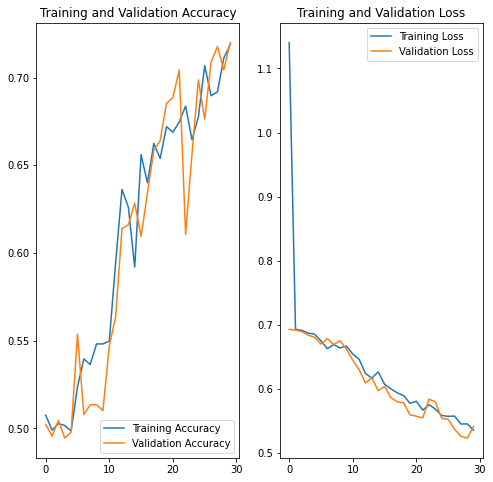

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()